## Regressione sui dati dei comune di Trento

Uso i dati divisi per squareID e per giorno dei 2 giorni precedenti per prevedere il consumo elettrico nel giorno successivo

In [38]:
import pandas as pd
import geopandas as gpd
import numpy as np

import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15, 25]


#from sklearn.linear_model import LogisticRegressionCV
#from sklearn.model_selection import GridSearchCV
#from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
#from sklearn.metrics import matthews_corrcoef, confusion_matrix, roc_curve, precision_recall_curve

## Importo i dati

In [43]:
data = pd.read_csv('data/processed/regressione_Trento.csv')
columns = data.columns

In [44]:
target = data['POWER']

In [45]:
features_names = columns[1:len(columns)-1]
features = data[features_names]

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=1)

In [47]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Regressione lineare

In [48]:
LR = LinearRegression()
LR.fit(X_train, Y_train)

print(f"Score on train = {LR.score(X_train, Y_train)}")
print(f"Score on test = {LR.score(X_test, Y_test)}")


Score on train = 0.9707280928870098
Score on test = 0.9708802281195223


<BarContainer object of 33 artists>

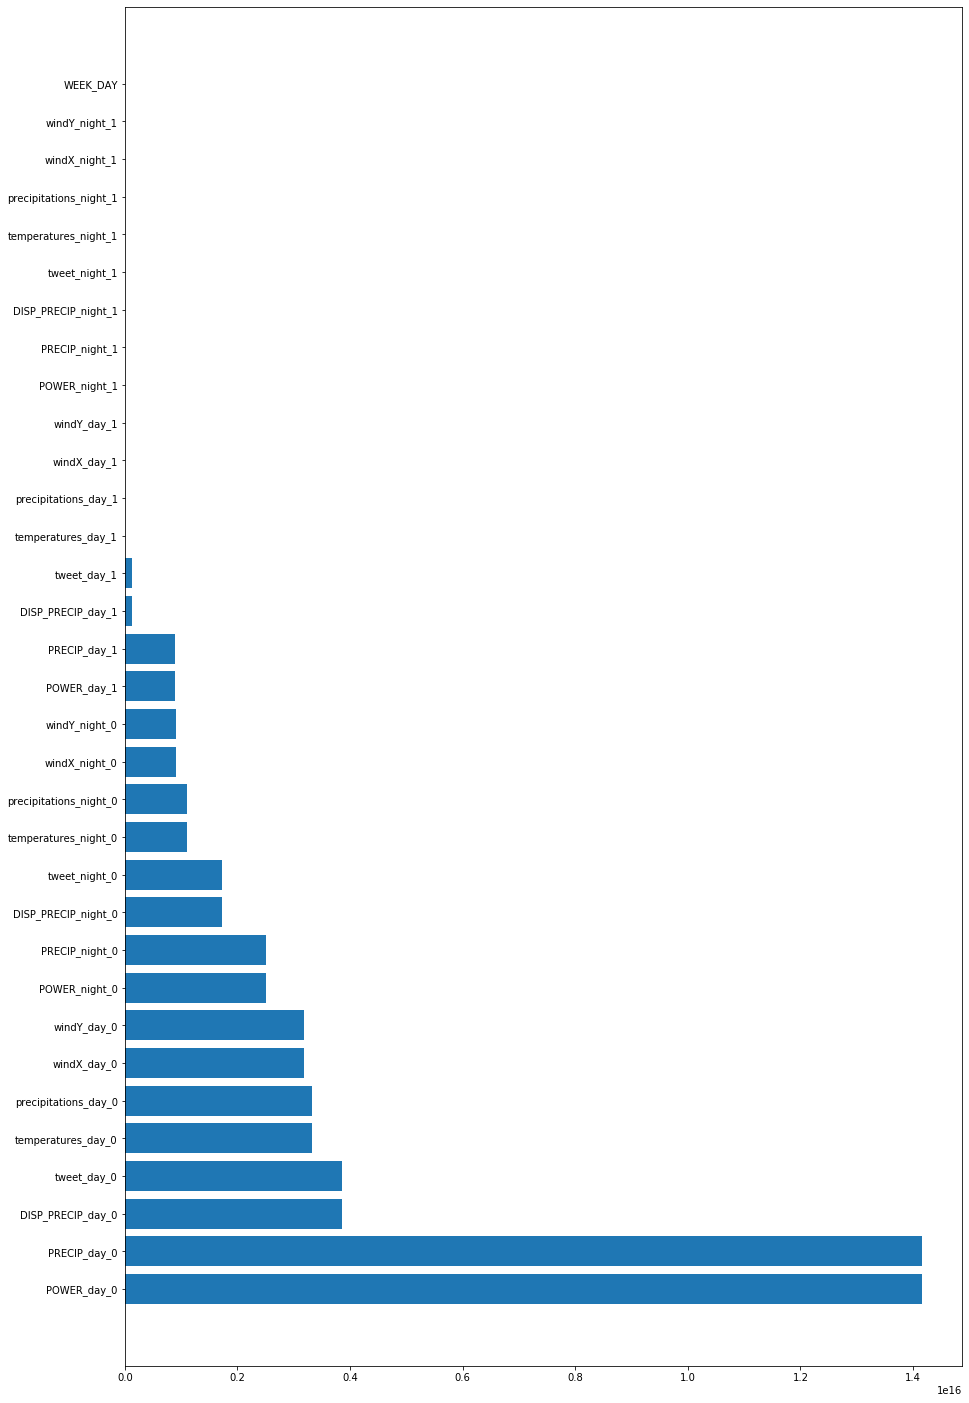

In [49]:
res = pd.DataFrame(data = LR.coef_, index = features_names, columns=['weight'],dtype=float).abs()
res.sort_values(by=['weight'], ascending = False, inplace = True)

plt.barh(y = features_names, width = res["weight"].tolist())

In [50]:
res

weight
temperatures_night_0    1.415766e+16
temperatures_day_0      1.415766e+16
precipitations_night_0  3.851500e+15
precipitations_day_0    3.851500e+15
windY_day_0             3.328599e+15
windY_night_0           3.328599e+15
precipitations_night_1  3.184602e+15
precipitations_day_1    3.184602e+15
windX_night_0           2.512643e+15
windX_day_0             2.512643e+15
tweet_night_1           1.731893e+15
tweet_day_1             1.731893e+15
windY_day_1             1.108100e+15
windY_night_1           1.108100e+15
windX_night_1           9.083951e+14
windX_day_1             9.083951e+14
tweet_day_0             8.991444e+14
tweet_night_0           8.991444e+14
temperatures_night_1    1.259536e+14
temperatures_day_1      1.259536e+14
POWER_night_0           1.395913e+04
POWER_night_1           3.936729e+03
POWER_day_1             2.201167e+03
WEEK_DAY                9.393611e+02
PRECIP_day_0            3.924840e+02
PRECIP_day_1            3.436019e+02
DISP_PRECIP_day_1       2.923014e+02
DISP_PRECIP_day_0       2.842417e+02
POWER_day_0             1.649659e+02
DISP_PRECIP_night_0     1.335888e+02
PRECIP_night_1          6.500305e+01
DISP_PRECIP_night_1     5.669419e+01
PRECIP_night_0          3.911039e+01

## Lasso con Cross-Validation

In [51]:
LR = LassoCV(cv=10, random_state=0)
LR.fit(X_train, Y_train)

print(f"Score on train = {LR.score(X_train, Y_train)}")
print(f"Score on test = {LR.score(X_test, Y_test)}")


Score on train = 0.9701706440666469
Score on test = 0.970239407099433


<BarContainer object of 33 artists>

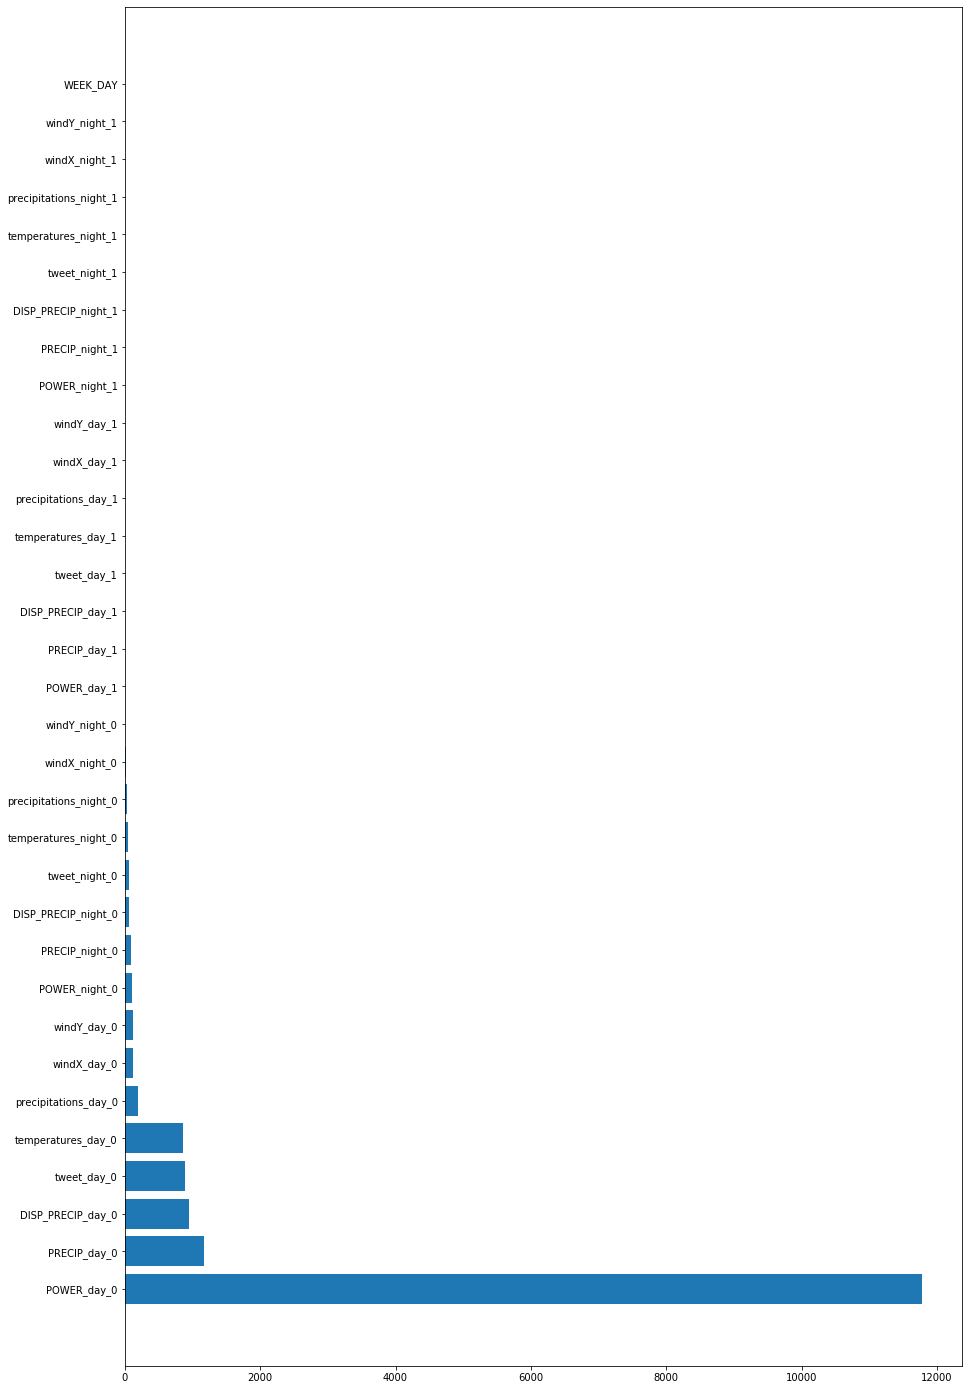

In [52]:
res = pd.DataFrame(data = LR.coef_, index = features_names, columns=['weight'],dtype=float).abs()
res.sort_values(by=['weight'], ascending = False, inplace = True)

plt.barh(y = features_names, width = res["weight"].tolist())

In [53]:
res

weight
POWER_night_0           11779.045308
POWER_night_1            1168.366726
WEEK_DAY                  946.122268
POWER_day_0               891.687101
POWER_day_1               856.049001
windY_day_1               194.588966
windX_night_0             126.039674
PRECIP_day_0              119.521549
PRECIP_night_0            103.390486
windY_day_0                96.946287
PRECIP_day_1               65.264554
precipitations_night_0     64.370484
windX_night_1              42.477554
PRECIP_night_1             27.529797
windY_night_1              15.223408
DISP_PRECIP_day_0           9.817415
tweet_night_1               0.347976
precipitations_night_1      0.000000
temperatures_night_1        0.000000
windX_day_1                 0.000000
DISP_PRECIP_night_1         0.000000
temperatures_day_0          0.000000
precipitations_day_1        0.000000
temperatures_day_1          0.000000
tweet_day_1                 0.000000
precipitations_day_0        0.000000
windY_night_0               0.000000
temperatures_night_0        0.000000
tweet_night_0               0.000000
DISP_PRECIP_night_0         0.000000
tweet_day_0                 0.000000
windX_day_0                 0.000000
DISP_PRECIP_day_1           0.000000

## Ridge con Cross Validation

In [54]:
LR = RidgeCV(cv=10) #da modificare a 100
LR.fit(X_train, Y_train)

print(f"Score on train = {LR.score(X_train, Y_train)}")
print(f"Score on test = {LR.score(X_test, Y_test)}")


Score on train = 0.9707268172057506
Score on test = 0.970893345088399


<BarContainer object of 33 artists>

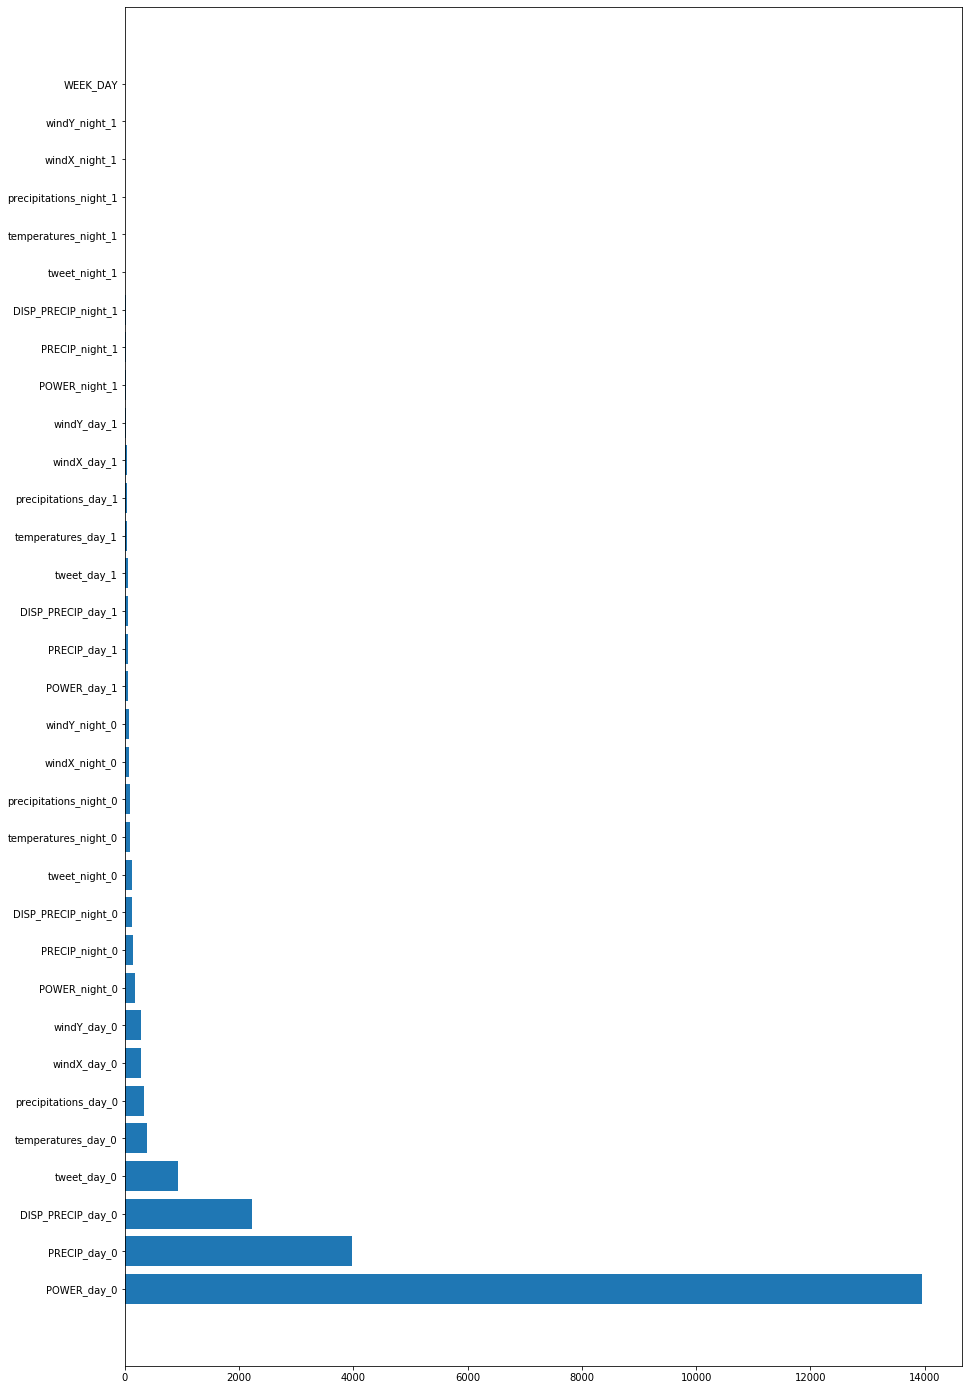

In [55]:
res = pd.DataFrame(data = LR.coef_, index = features_names, columns=['weight'],dtype=float).abs()
res.sort_values(by=['weight'], ascending = False, inplace = True)

plt.barh(y = features_names, width = res["weight"].tolist())

In [56]:
res

weight
POWER_night_0           13951.296611
POWER_night_1            3973.083012
POWER_day_1              2233.653702
WEEK_DAY                  938.666811
PRECIP_day_0              381.575240
PRECIP_day_1              331.922248
DISP_PRECIP_day_1         285.287679
DISP_PRECIP_day_0         275.846802
POWER_day_0               176.015002
DISP_PRECIP_night_0       139.760443
windY_night_1             118.152608
windY_day_1               118.152608
windX_night_0              88.046166
windX_day_0                88.046166
windY_day_0                70.664798
windY_night_0              70.664798
PRECIP_night_1             61.858439
DISP_PRECIP_night_1        51.921413
windX_day_1                49.410746
windX_night_1              49.410746
PRECIP_night_0             39.553470
precipitations_day_0       34.830085
precipitations_night_0     34.830085
temperatures_night_0       22.057285
temperatures_day_0         22.057285
tweet_day_0                15.199796
tweet_night_0              15.199796
temperatures_night_1        9.696060
temperatures_day_1          9.696060
tweet_day_1                 4.961146
tweet_night_1               4.961146
precipitations_night_1      0.919818
precipitations_day_1        0.919818

## Conclusione
Tutti e tre i modelli sembrano funzionare ugualmente bene, in particolare tutti raggiungono errori sul set di train di circa 0.970 e 0.970 sul set di test. Il LassoCV presenta un accuratezza leggermente inferiore tuttavia usa meno dati, questo potrebbe essere un vantaggio in termini di velocità e memoria utilizzata. 